<a href="https://colab.research.google.com/github/yasuhiroinoue/AppMathSci/blob/main/%E5%BF%9C%E7%94%A8%E6%95%B0%E7%90%86(2021_11_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**応用数理科学（第5回）**##
###**感染症の数理モデル**###

伝染病の広がりについて、数理モデルを用いて考えよう。ここでは、数理モデルから得られる閾値定理と基本再生産数による理解を学ぶ。


以下のように、変数を定義する


1.   S: 感染する可能性のある人の数（割合）＝通常は未感染者の数（割合）
2.   I: 感染者の数（割合）
3.   R: 回復者/除外者（回復して免疫ができた、亡くなった、隔離されてた者）の数（割合）

閉ざされた個体群を考えると、全体数$N$は定数として
$$
S+I+R=N
$$
を満たすとする。別の表し方として、$S, I, R$を全体に対するそれぞれの割合と考えると
$$
S+I+R=1
$$
である。本講義ではこちらの定義で進める。


$$
\frac{dS}{dt}= -\beta SI \tag{1}
$$
$$
\frac{dI}{dt}= \beta SI - \gamma I \tag{2}
$$
$$
\frac{dR}{dt}= \gamma I\tag{3}
$$
$\beta > 0$は感染率[1/(人・単位時間)]、$\gamma > 0$は回復率（除外率）[1/単位時間]である。　

式(1)、(2)より
$$
\frac{dI}{dS} = -1 + \frac{\rho}{S}\tag{4}
$$
ここで、$\rho = \gamma/\beta$である。

$S-I$平面上での動きを考えると、傾き$dI/dS$の正負を考えればよい。
明らかに、定数$\rho$が重要な値で、閾値と呼ばれる。$S < \rho$の区間では$dI/dS > 0$、$S > \rho$の区間では$dI/dS < 0$である。つまり、縦軸$I$、横軸$S$で相平面を考えると上に凸の曲線となる。

時間とともに、通常、$S$は減少するので、以下のようになる。
もし、初期値$S_0 < \rho$ならば$I$は時間とともに減少、$S_0 > \rho$ならば時間とともに増加し、$S=\rho$のとき、$I$はピーク値となり、その後、減少する。

###**閾値定理**###
感染拡大前の初期において（$I_0 \ll S_0$）、$S_0 > \rho $であれば、最終的に感染症にかかる人数は
$$
2(S_0-\rho)
$$
である。

###**解説**###

式(4)より、
$$
I = N - S + \rho \log (S/S_0)
$$
となる。

初期において、
$$
I_0 = N - S_0
$$
であり、いま、$I_0\ll S_0$を仮定するので
$$
N \sim S_0 \tag{5}
$$

一方、$t \rightarrow \infty$のとき、$I\rightarrow 0$であるので
$$
0=N-S_\infty + \rho\log (S_\infty/S_0)
$$
式(5)を使うと
$$
0=S_0-S_\infty + \rho\log (S_\infty/S_0)
$$
となる。$S_\infty \ll S_0$と考えられるので、次のように式変形して展開する。
$$
0 = S_0 - S_\infty + \rho\log (1 - (1 - S_\infty/S_0))
$$
$$
\approx S_0 - S_\infty + \rho\left\{\left(\frac{S_\infty}{S_0}-1\right)-\frac{1}{2}\left(\frac{S_\infty}{S_0}-1\right)^2\right\}
$$
上式を$S_0-S_\infty$でくくり、$S_0 \neq S_\infty$であることを使うと
$$
S_0-S_\infty=\frac{2S_0^2}{\rho}\left(1-\frac{\rho}{S_0}\right)
$$
となる。
いま、$S_0=\rho+\nu$（微小量$\nu \ll \rho$）とすると
$$
S_0-S_\infty \sim 2\nu
$$
$S_0-S_\infty$の差は感染したことがある人数$(I+R)$である。したがって、
最終的に感染症にかかる人数は、$S_0$と閾値$\rho$との差の2倍分となる（閾値定理）。

###**基本再生産数**###
式(2)より、
$$
\frac{dI}{dt} = \gamma \left(\frac{\beta S}{\gamma} - 1 \right )I
$$
と変形できるので、$\beta S / \gamma > 1$であれば$dI/dt > 0$（感染者の増加）、$\beta S/\gamma < 1$であれば$dI/dt < 0$（感染者の減少）となる。これをSIRモデルの基本再生産数という。


$\beta S/\gamma$のうち、$1/\gamma$は回復までの時定数であるので、感染期間となる。$\beta$は単位時間当たり、一人が感染させる確率であり、そこに感染可能者をかけるので、$\beta S$は一人が感染させることができる単位時間あたりの期待人数である。よって、基本再生産数とは、感染期間において、感染者一人から広がる新規感染者の期待人数である。

1.8 0.5 0.4


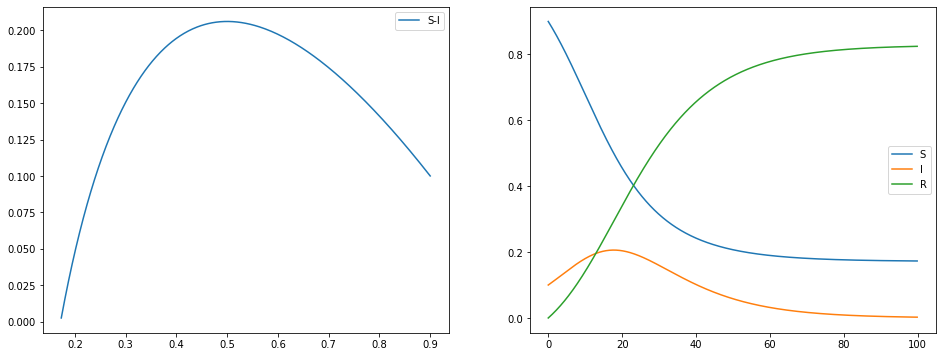

In [ ]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
from scipy import integrate
import math
import matplotlib.pyplot as plt

def func(v, t, b, g):
  """
  S=v[0]
  I=v[1]
  R=v[2]
  dS/dt = -b*SI
  dI/dt = b*SI- gI
  dR/dt = gI
  """
  return [-b*v[0]*v[1],b*v[0]*v[1]-g*v[1],g*v[1]]

b=0.2
g=0.1
T=100
v0 = [0.9,0.1,0]
t = np.arange(0, T, 0.1)
v = odeint(func, v0, t, args=(b,g))

r_0 = b*v0[0]/g
rho = g/b
print(r_0, rho, v0[0]-rho)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(v[:, 0], v[:, 1],label="S-I")
plt.legend()
plt.subplot(1,2,2)
plt.plot(t,v[:, 0],label="S")
plt.plot(t,v[:, 1],label="I")
plt.plot(t,v[:, 2],label="R")
plt.legend()

###**ネットワーク上の感染**##


人の知り合い関係のネットワークは、スモールワールドネットワークといわれる。このネットワークでは、平均して6人の知り合いを介するとだれでも知り合い、というネットワークである。
トポロジーとしては、1次元のレギュラーネットワーク（円環）にバイパスを入れることで作ることが出来る。このスモールワールドネットワークの構造を考慮した感染症のシミュレーションを最後に紹介する。
もちろん、SIRモデルは強力であり、結果の定性的な性質は大きく変わらない。静的なネットワーク構造では、実質的には基本再生産数を構成する接触機会が定数変化するだけだからと解釈できる。

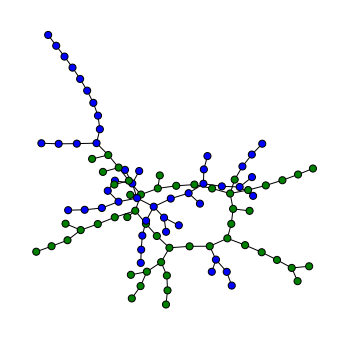

In [6]:
## 参考文献
## このコードは以下の書籍を参考に、少し変更しています
## Pythonコンピュータシミュレーション入門 人文・自然・社会科学の数理モデル (橋本洋志, 牧野浩二）
##

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import copy
import random


## スモールワールドの代表的なネットワーク
## ワッツ・ストロガッツモデルで表されるネットワークの上を、伝染病が広がるシミュレーション
##
G = nx.watts_strogatz_graph(100,2,0.5)
pos = nx.kamada_kawai_layout(G)

num = nx.number_of_nodes(G)
nc = np.zeros(nx.number_of_nodes(G), dtype=int)
nt = np.zeros(nx.number_of_nodes(G), dtype=int)
# nc --> 0: S
# nc --> 1: I 
# nc --> 2: R
# nt --> (5,4,3,2,1,0)感染期間のカウンター

##初期条件
nc[0] = 1#初期条件において、ノード0番を感染者とする。
nt[0] = 5#初期条件において、ncと同じインデックスに5を立てる。
##

plot_dataS = []
plot_dataI = []
plot_dataR = []

color_list = ["b", "r", "g", "c", "m", "y"]

fig = plt.figure(figsize = (6, 6)) 

def update(k):
    global nc, nt, G
    plt.cla()
    plt.axis('off')
    colors = [color_list[x] for x in nc]
    nx.draw_networkx(G, pos, node_color=colors, edgecolors='k', node_size=50, with_labels=False)
    plot_dataS.append(np.count_nonzero(nc==0))
    plot_dataI.append(np.count_nonzero(nc==1))
    plot_dataR.append(np.count_nonzero(nc==2))
    if len(plot_dataI)==1:return
    for n0 in range(nx.number_of_nodes(G)):
        if nt[n0] > 0:
            nt[n0] -= 1
            if nt[n0] == 0:
                nc[n0] = 2
    nctmp = np.copy(nc)
    nttmp = np.copy(nt)
    for n0 in range(nx.number_of_nodes(G)):
        for n1 in list(nx.neighbors(G, n0)):
            if nc[n0] == 1 and nc[n1] ==0 and random.random()<0.5:
                nctmp[n1] = 1
                nttmp[n1] = 5
    nc = copy.copy(nctmp)
    nt = copy.copy(nttmp)

ani = animation.FuncAnimation(fig, update, interval = 1, frames = 50, repeat=False)
HTML(ani.to_jshtml())

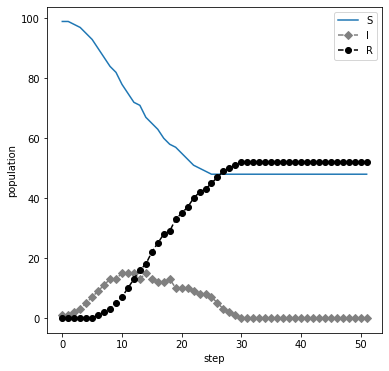

In [7]:
plt.figure(figsize = (6, 6)) 
plt.xlabel("step")
plt.ylabel("population")
plt.plot(plot_dataS, label="S" )
plt.plot(plot_dataI, label="I", marker="D", color = "gray", linestyle = "--")
plt.plot(plot_dataR, label="R", marker="o", color = "k", linestyle = "--")
plt.legend()
plt.show()